In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import pandas as pd
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout


In [31]:
(x_train, y_train), (x_test, y_test) = tfds.as_numpy(tfds.load(
    name = 'kmnist',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

In [32]:
x_train = x_train.squeeze()
x_test = x_test.squeeze()

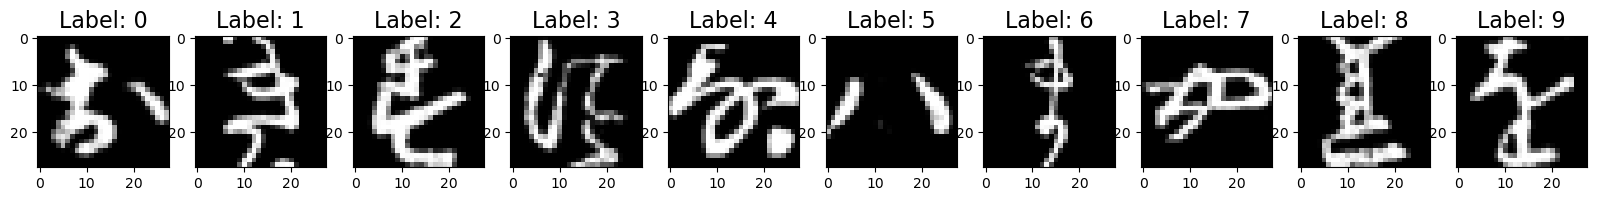

In [33]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [34]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

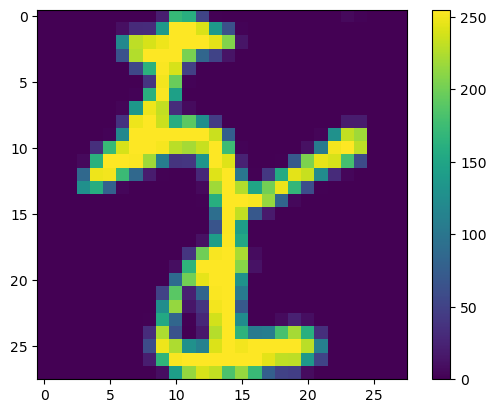

In [35]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [36]:
x_train = x_train / 255.0
x_test = x_test / 255.0

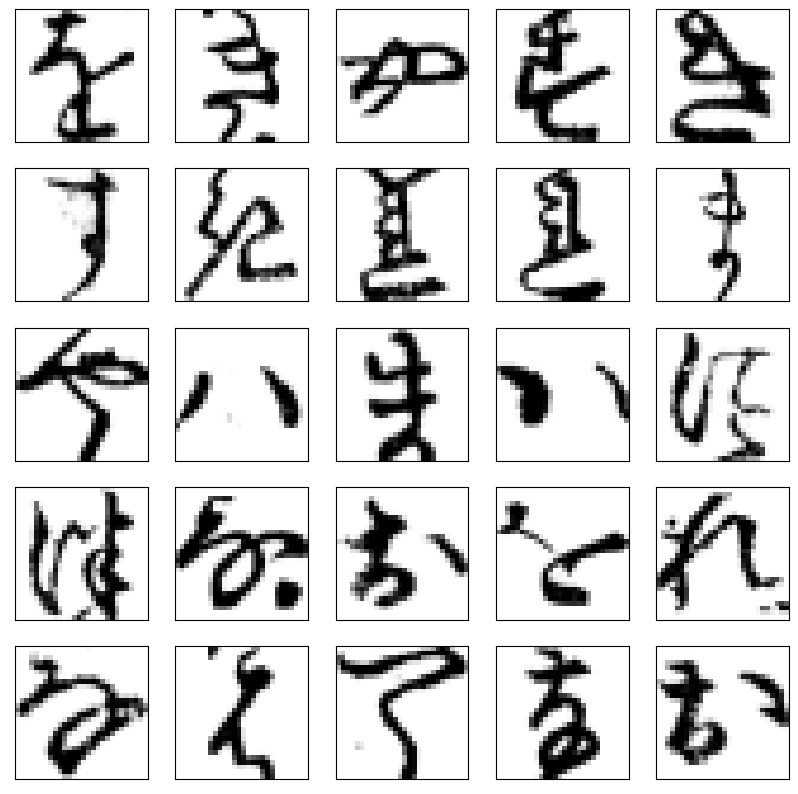

In [37]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [38]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


In [39]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [40]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [41]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 2s 6ms/step - loss: 0.7687 - accuracy: 0.7658
Epoch 2/10
118/118 [==============================] - 1s 7ms/step - loss: 0.3610 - accuracy: 0.8915
Epoch 3/10
118/118 [==============================] - 1s 7ms/step - loss: 0.2752 - accuracy: 0.9174
Epoch 4/10
118/118 [==============================] - 1s 7ms/step - loss: 0.2241 - accuracy: 0.9332
Epoch 5/10
118/118 [==============================] - 1s 7ms/step - loss: 0.1904 - accuracy: 0.9438
Epoch 6/10
118/118 [==============================] - 1s 7ms/step - loss: 0.1647 - accuracy: 0.9516
Epoch 7/10
118/118 [==============================] - 1s 7ms/step - loss: 0.1422 - accuracy: 0.9582
Epoch 8/10
118/118 [==============================] - 1s 7ms/step - loss: 0.1243 - accuracy: 0.9625
Epoch 9/10
118/118 [==============================] - 1s 7ms/step - loss: 0.1119 - accuracy: 0.9672
Epoch 10/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0989 - accuracy: 0.9711

In [42]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 1ms/step - loss: 0.3808 - accuracy: 0.8936
Test Loss: 0.3808172345161438, Test Accuracy: 0.8935999870300293


In [43]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 0s 1ms/step
[[3.2118990e-06 1.1249901e-09 2.3290515e-07 ... 9.7699548e-08
  5.6917311e-06 1.8770464e-08]
 [2.5812874e-04 2.3757832e-04 2.2085039e-02 ... 2.1996703e-03
  1.2869852e-03 9.7221822e-01]
 [1.7203541e-02 1.1071315e-04 5.5875961e-04 ... 9.5926803e-01
  1.0818103e-02 2.4312591e-05]
 ...
 [5.0049892e-10 1.3620921e-06 2.9396172e-06 ... 7.8949913e-10
  9.9999523e-01 2.5298235e-07]
 [8.7169261e-05 3.2344166e-02 4.9166608e-04 ... 4.0858606e-05
  2.8558611e-03 3.4871744e-03]
 [2.1041743e-02 1.8584696e-03 2.2018168e-03 ... 7.8793710e-01
  6.7256275e-04 1.7507984e-03]]
[5 9 7 ... 8 5 7]


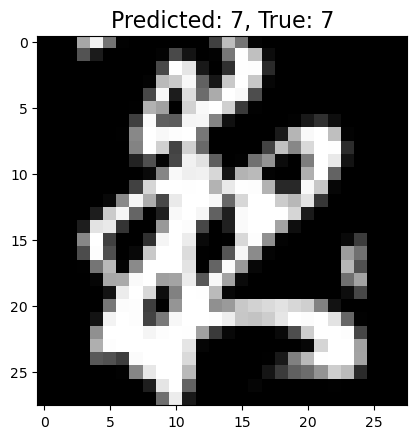

In [44]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

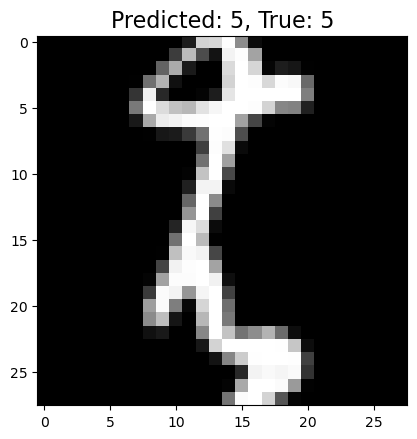

In [45]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

In [48]:
model.save('modelo/model.h5')
print('Model saved!')

Model saved!
